# Importing Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


# Importing the SBI Life Insurance Dataset

In [2]:
#importing the red wine dataset (in csv format)
#we are storing our dataset in "df" variable to make our job easier.
df=pd.read_csv('loan.csv')

# More Data Exploration

In [3]:
'''checking the first five rows of the Dataset to get the overview of the overall Data'''

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



Lets check for the number of rows and columns of the given Dataset

In [4]:
df.shape

(614, 13)

we have 614 rows and 13 columns

Now to to get clear view of the Data lets see the names of the columns and differenciate between

Target Variable and Input Variables

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Checking Missing Values

from above output,it is clearly visible that all the values of each column are either float type-- or integer type. one thing to be noticed here is that only output variable is in integer type ,all other variables-- --are in float type. Now lets check for sum of the missing values in each column-->

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Missing Value Imputation

In [11]:

'''
Missing values imputation
'''
cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in cols:
    print('Imputation with zero: %s' % (col))
    df[col].fillna(0, inplace=True)
    
    
print('Missing value imputation done.')

Imputation with zero: Gender
Imputation with zero: Married
Imputation with zero: Dependents
Imputation with zero: Self_Employed
Imputation with zero: LoanAmount
Imputation with zero: Loan_Amount_Term
Imputation with zero: Credit_History
Missing value imputation done.


In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Statistical Summary of the Dataset

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,141.361564,334.201954,0.773616
std,6109.041673,2926.248369,88.160370,82.183884,0.418832
min,150.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Correlation Analysis

In [14]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.539552,-0.015645,0.006986
CoapplicantIncome,-0.116605,1.000000,0.189537,-0.050321,-0.058795
LoanAmount,0.539552,0.189537,1.000000,0.059336,-0.031577
Loan_Amount_Term,-0.015645,-0.050321,0.059336,1.000000,0.050145
Credit_History,0.006986,-0.058795,-0.031577,0.050145,1.000000


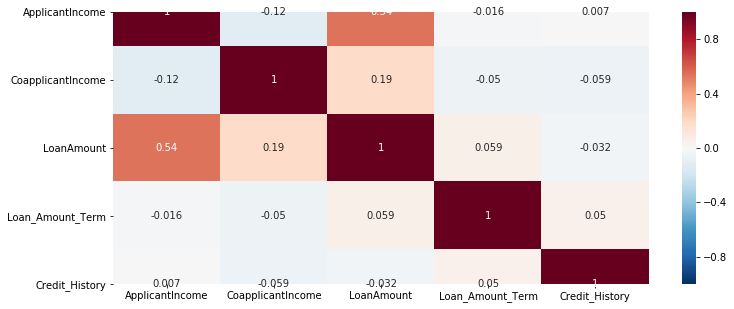

In [15]:
correlation = df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

# Univariate and Bivariate Analysis

In [17]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [18]:
df.Loan_Status.value_counts().sort_index()

N    192
Y    422
Name: Loan_Status, dtype: int64

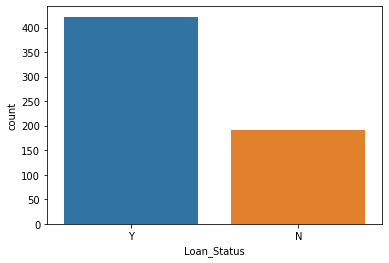

In [19]:
#plotting the graph for visualizing better the distribution of "insuranceclaim" variable.
sns.countplot(x='Loan_Status', data=df)

In [20]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

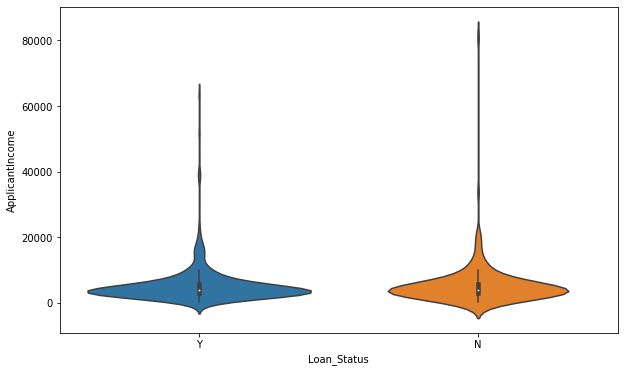

In [21]:
fig = plt.figure(figsize = (10,6))
sns.violinplot(x = 'Loan_Status', y = 'ApplicantIncome', data = df)

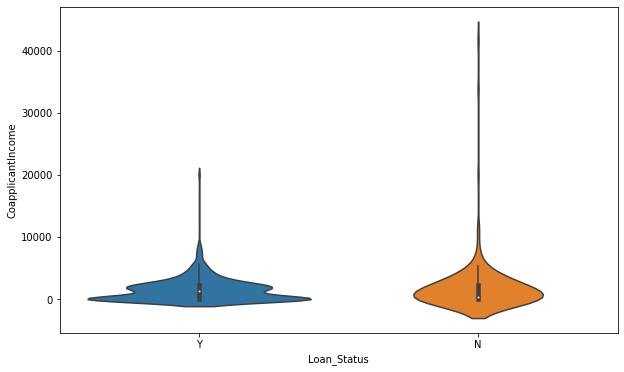

In [22]:
fig = plt.figure(figsize = (10,6))
sns.violinplot(x = 'Loan_Status', y = 'CoapplicantIncome', data = df)

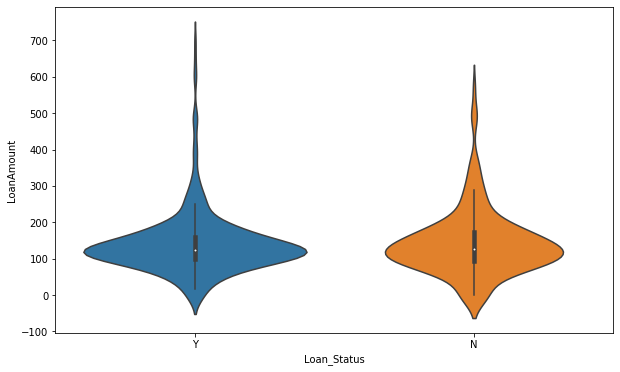

In [23]:
fig = plt.figure(figsize = (10,6))
sns.violinplot(x = 'Loan_Status', y = 'LoanAmount', data = df)

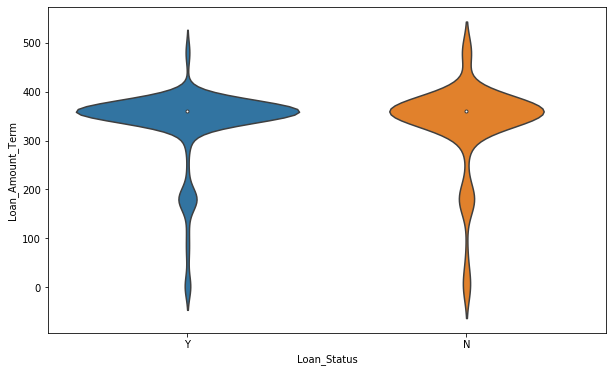

In [24]:
fig = plt.figure(figsize = (10,6))
sns.violinplot(x = 'Loan_Status', y = 'Loan_Amount_Term', data = df)

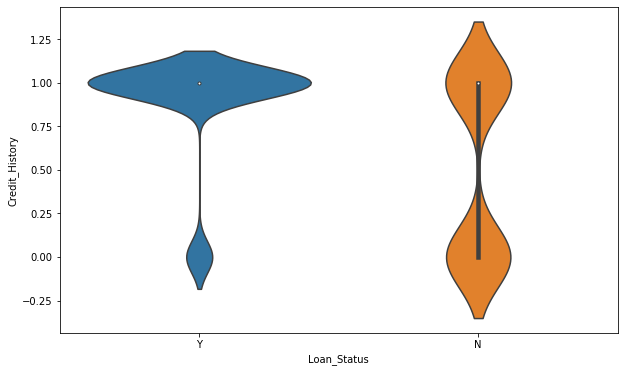

In [25]:
fig = plt.figure(figsize = (10,6))
sns.violinplot(x = 'Loan_Status', y = 'Credit_History', data = df)

# Label Encoding/One Hot Encoding

In [26]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [33]:
'''LabelEnconding the Categorical Data'''
df['Loan_Status'] = LabelEncoder().fit_transform(df['Loan_Status'])

In [34]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [38]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [39]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

# Now performing Train_Test_Split to separate target and input variables

In [45]:
'''Learning Features and Predicting Features'''
x_train = df.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Loan_Status','Property_Area'], axis = 1)
y_train = df['Loan_Status']                     


In [46]:
x_train.shape

(614, 5)

In [47]:
x_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,120.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [48]:
y_train.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [49]:
'''Train Test Split , 70:30 Ratio'''
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [51]:
x_train.shape

(411, 5)

In [52]:
y_train.shape

(411,)

In [53]:
x_test.shape

(203, 5)

In [54]:
y_test.shape

(203,)

# Applying Standardiztion Technique to get optimized results through Standard Scaler

In [55]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Model Selection

The target variable in the given dataset is being converted into classifications hence the problem

becomes classification problem.

Therefore the machine learning algorithms of classification can be applied here in for training and

testing of data.

We will check for the best model one by one

# Applying various Machine Learning Models to Train and test the Dataset

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [57]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [58]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n ')

0.7832512315270936
[[ 40  32]
 [ 12 119]]
              precision    recall  f1-score   support

           0       0.77      0.56      0.65        72
           1       0.79      0.91      0.84       131

    accuracy                           0.78       203
   macro avg       0.78      0.73      0.74       203
weighted avg       0.78      0.78      0.77       203


 
0.7635467980295566
[[ 42  30]
 [ 18 113]]
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        72
           1       0.79      0.86      0.82       131

    accuracy                           0.76       203
   macro avg       0.75      0.72      0.73       203
weighted avg       0.76      0.76      0.76       203


 
0.7783251231527094
[[ 39  33]
 [ 12 119]]
              precision    recall  f1-score   support

           0       0.76      0.54      0.63        72
           1       0.78      0.91      0.84       131

    accuracy                           0.78       

In [59]:
from sklearn.neighbors import KNeighborsClassifier as knn

# Checking Consistency on KNN Model using Cross Validation

In [60]:
score=cross_val_score(knn(n_neighbors=18,),X=x_train, y=y_train,cv=10)

In [61]:
score

array([0.76190476, 0.82926829, 0.73170732, 0.7804878 , 0.70731707,
       0.70731707, 0.73170732, 0.87804878, 0.75609756, 0.75609756])

In [62]:
score.mean()*100,score.std()*100

(76.39953542392567, 5.116615296384844)

In [63]:
clf=knn(n_neighbors=18)
clf.fit(x_train,y_train)
score1=clf.score(x_train,y_train)
score=clf.score(x_test,y_test)
score1,score

(0.7688564476885644, 0.7881773399014779)

In [84]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.30, random_state=42)

In [85]:
'''Creating Object of SVM'''
from sklearn import svm

svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred)

In [86]:
result_acc

0.75

In [87]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [88]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.76      0.54      0.63        72
           1       0.78      0.91      0.84       131

    accuracy                           0.78       203
   macro avg       0.77      0.73      0.74       203
weighted avg       0.78      0.78      0.77       203



# Finding best parameters through GridSearchCV

In [89]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [90]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [91]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [92]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 0.1, gamma =  0.1, kernel= 'linear')
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.76      0.57      0.65        72
           1       0.79      0.90      0.84       131

    accuracy                           0.78       203
   macro avg       0.78      0.74      0.75       203
weighted avg       0.78      0.78      0.77       203



SVM model is giving the best result approx 80%

# Storing the predicted results in csv file

In [93]:
pred_svm = pd.DataFrame(Y_pred, columns=['y_pred']).to_csv('loan.csv')

# Saving the best Model as a pickle in a file

I have selected SVM Model as best model as it is giving me best accuracy score after performing overfitting and underfitting

In [95]:
from sklearn.externals import joblib

In [96]:
joblib.dump(svc,'loan.pkl')

['loan.pkl']